### <center>📜 **<font color="green">Question 4:</font> The price of the accommodation by district and the statistics of the area of ​​the rooms (how much space most of the rooms occupy) and the link between the amount and the area of ​​each district (which is the most expensive or the average district). Why is that?** </center>


#### 📙**Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

### ✨ **1. Get data preprocessing**

In [2]:
# Read the data
df = pd.read_csv('../data/HCMHouseRentPreprocessing.csv')  
df.head(10)
df.set_index('id')

,title,price,published,acreage,street,ward,district
id,,,,,,,
0,"Cho thuê nhà trọ mới sạch đẹp tại Lê Đình Cẩn,...",2200000,2022-05-16,20.0,Lê Đình Cẩn,Phường Tân Tạo,Quận Bình Tân
1,Cho thuê phòng trọ giá rẻ ở mặt tiền hẻm lớn Đ...,2500000,2022-04-20,20.0,487/35/25 Đường Huỳnh Tấn Phát,Phường Tân Thuận Đông,Quận 7
2,Cho thuê phòng trọ kdc Nam Long-Trần Trọng Cun...,3500000,2022-05-10,30.0,Đường 10,Phường Tân Thuận Đông,Quận 7
3,Phòng trọ giá rẻ ngay cổng khu chế xuất Tân Th...,1500000,2022-05-05,30.0,283/15 Huỳnh Tấn Phát,Phường Tân Thuận Đông,Quận 7
4,"Cho thuê phòng có gác, không gác, tolet riêng ...",3500000,2022-01-05,18.0,Lê Văn Sỹ,Phường 14,Quận Phú Nhuận
...,...,...,...,...,...,...,...
8872,Cho thuê phòng trọ gần trung tâm quận 11,2200000,2020-10-30,14.0,102/9/11a Đường Bình Thới,Phường 14,Quận 11
8873,Cho thuê phòng hoặc tầng 1 và 2 nhà mặt tiền 1...,2500000,2020-11-23,12.0,177 Đường Tôn Thất Hiệp,Phường 12,Quận 11
8874,Phòng FULL NOI THAT THOÁNG ĐẸP NHƯ HÌNH GẦN LÊ...,3500000,2022-07-28,20.0,212 Đường Lò Siêu,Phường 12,Quận 11


### 🔥**2.Statistics on average price and area of ​​each district.**

In [3]:
# create new column price_per_square_meter
df['price_per_square_meter'] = df['price'] / df['acreage']

# group by district and calculate average price, acreage, price_per_square_meter
price_per_square_meter = round(df.groupby('district').price_per_square_meter.mean().sort_values(ascending=False), 3)

# create dataframe has district, price and acreage
new_df = pd.DataFrame({'district':price_per_square_meter.index, 'price_per_square_meter': price_per_square_meter.values})

# sort by price_per_square_meter
new_df = new_df.sort_values(by='price_per_square_meter', ascending=False)
new_df

,district,price_per_square_meter
0,Quận 1,192466.859
1,Quận 3,183088.257
2,Quận Phú Nhuận,175635.042
3,Quận Bình Thạnh,165769.210
4,Quận 4,160280.983
5,Quận 8,154985.582
6,Quận 5,153208.955
7,Quận 10,150137.404
8,Quận Tân Bình,149443.678
9,Quận 7,147048.753


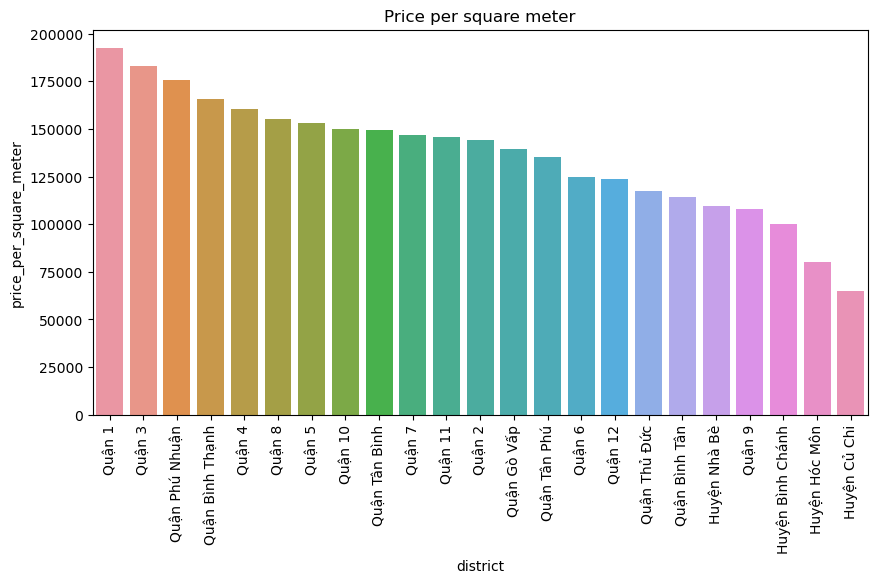

In [4]:
# visualize the price per square meter
plt.figure(figsize=(10, 5))
sns.barplot(x=new_df['district'], y=new_df['price_per_square_meter'])
plt.xticks(rotation=90)
plt.title('Price per square meter')
plt.show()

>- <b>Comments:</b>
>   - Based on the chart above, we can see that the rent of accommodation in District 1, District 3 is quite high compared to other districts (average 180000-190000/m^2). This may be due to the location of these districts in the city center, so many people rent rooms here.
>   - Hoc Mon and Cu Chi districts are located far from the city center, with few schools and industrial parks, so the demand for rental accommodation here is quite small, so the rental price here is lower than other districts.(only) about 60000-80000/m^2)
>   - The rest, the rental price in other districts is at the average level with the income of the people of the City. Because these districts are located near the city center, it is also convenient for students, students as well as workers.

### 📌3. For each district, show the percentage of acreage 

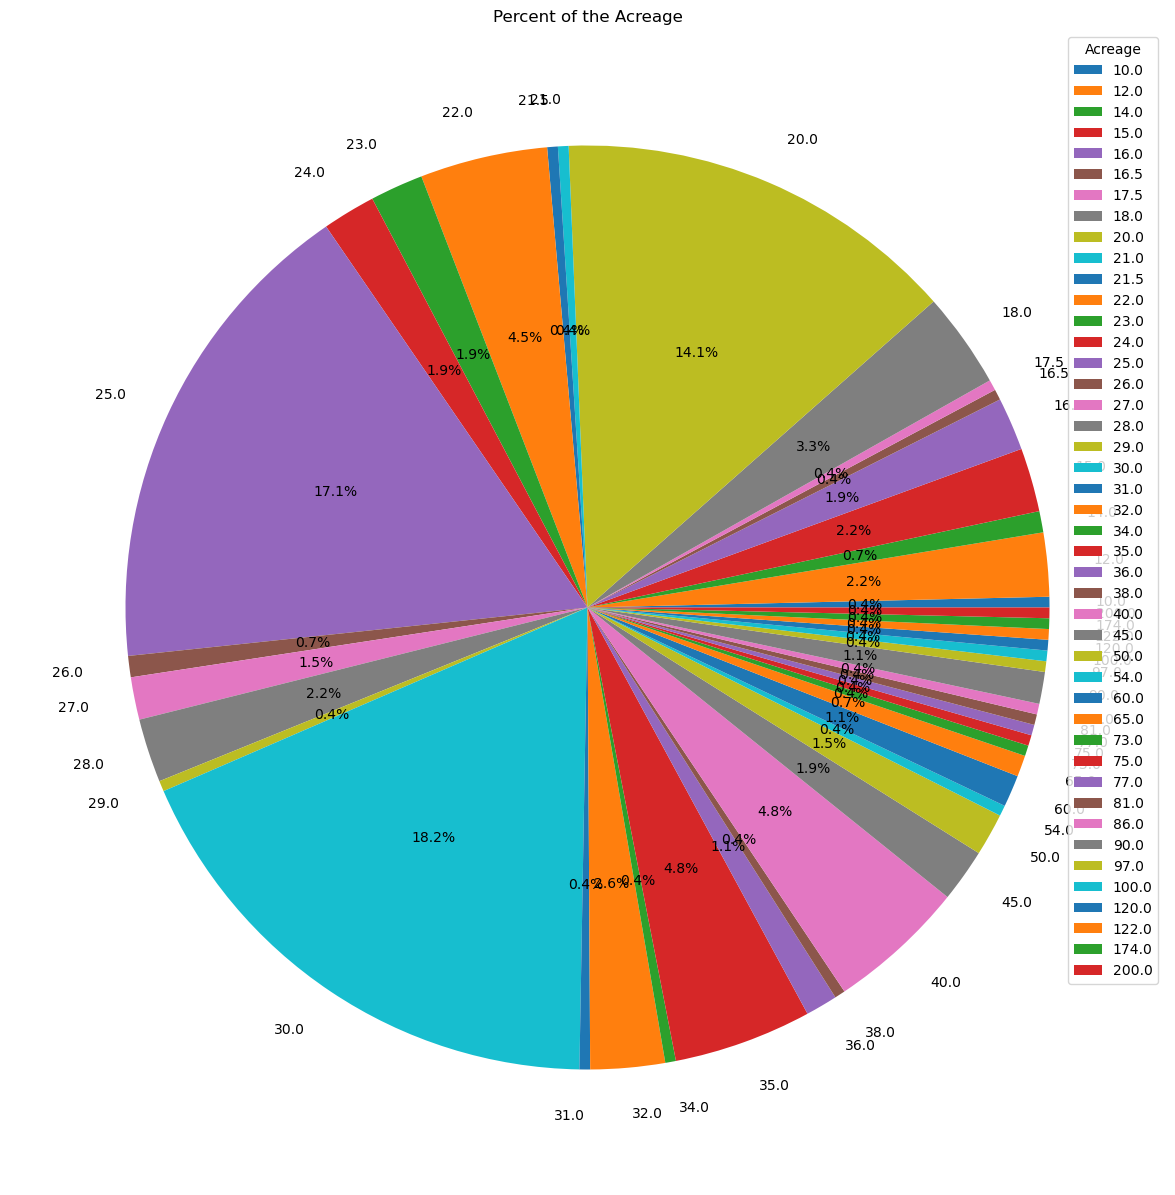

In [5]:
#choose district to visualize percent of the acreage
district = 'Quận 2'
choose_district = df[df['district'] == district]
choose_district = choose_district.sort_values(by='acreage', ascending=False)
choose_district.head(20)

# calculate the percent of the acreage
percent = choose_district['acreage'].value_counts(normalize=True) * 100
percent = percent.sort_index()

# plot the percent of the acreage with pie chart with annotation
plt.figure(figsize=(15, 15))
plt.pie(percent, labels=percent.index, autopct='%1.1f%%')
plt.title('Percent of the Acreage')
plt.legend(title='Acreage')
plt.show()

&#9889; <font color="yellow"><b>What are benefits of finding the answer? </b></font>
>- Knowing the price of accommodation in each district, combined with the area, we will know how different each district will be.
>- From there, you can find the right accommodation for each person's needs.

### 📌4. For chosen district, price analysis by street

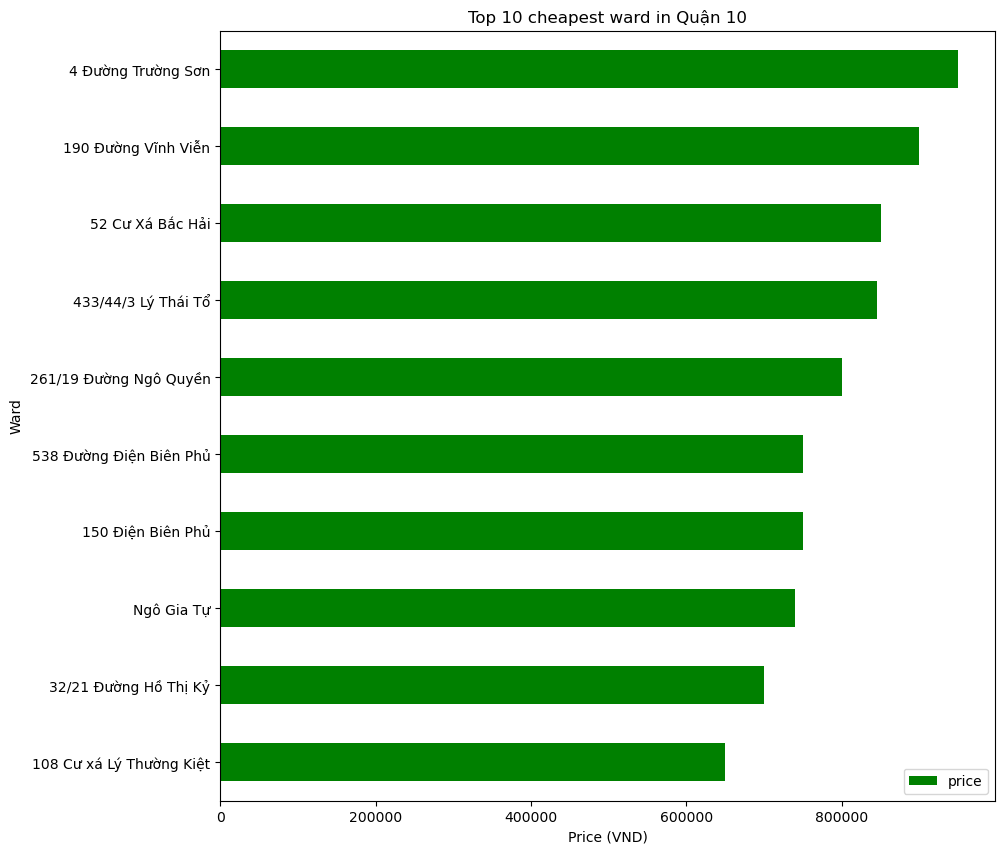

In [6]:
# choose district and get the list of ward
district = 'Quận 10'
choose_district = df[df['district'] == district]
ward_list = choose_district['street'].unique()
ward_list

# group by ward and get the mean of price
grouped = choose_district.groupby('street')
ward_mean = grouped['price'].mean()
ward_mean

# create a new dataframe
df_ward = pd.DataFrame(ward_mean)
df_ward = df_ward.sort_values(by='price', ascending=True)

# visualize top 10 in bar chart
df_ward_top10 = df_ward.head(10)
df_ward_top10.plot(kind='barh', figsize=(10, 10), color='green')
plt.title('Top 10 cheapest ward in ' + district)
plt.xlabel('Price (VND)')
plt.ylabel('Ward')
plt.show()


&#9889; <font color="yellow"><b>What are benefits of finding the answer? </b></font>
>- Helps tenants find addresses with rents that fit their budget because statistics by street in the district help tenants have a more intuitive view.